## Import all used libraries here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## upload data from csv files

In [2]:
dfTrain = pd.read_csv("train.csv", index_col="Id")
dfTest = pd.read_csv("test.csv", index_col="Id")
df = pd.concat([dfTrain, dfTest], axis=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [4]:
correlations = df.corr()[["SalePrice"]]
correlations.sort_values("SalePrice", ascending=False, inplace=True)
correlations

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [5]:
df[df["GarageCars"].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


In [6]:
df["GarageCars"].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [7]:
df["GarageCars"].fillna(2, inplace=True)

In [8]:
df.loc[df["GarageArea"].isnull(), "GarageArea"] = df["GarageArea"].mean()

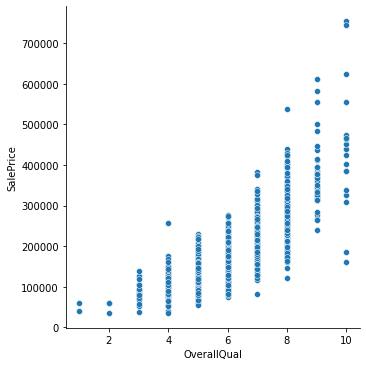

In [9]:
sns.relplot(x="OverallQual", y="SalePrice", data=df, kind="scatter")
plt.show()

In [10]:
for column in df.columns:
    if df[column].dtype == "object":
        print(df[column].value_counts())
        print("-"*25)
        

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
-------------------------
Pave    2907
Grvl      12
Name: Street, dtype: int64
-------------------------
Grvl    120
Pave     78
Name: Alley, dtype: int64
-------------------------
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
-------------------------
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
-------------------------
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
-------------------------
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
-------------------------
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
-------------------------
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor

In [11]:
df["MSZoning"].fillna("RL", inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [13]:
df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mean(), inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [15]:
correlations = df.corr()[["SalePrice"]].sort_values("SalePrice", ascending=False)
correlations

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [16]:
usableCols = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "YearBuilt"]
X = df.loc[df["SalePrice"].notnull(), usableCols]
y = df.loc[df["SalePrice"].notnull(), "SalePrice"]
Xtest = df.loc[df["SalePrice"].isnull(), usableCols]

In [17]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   GrLivArea    1459 non-null   int64  
 2   GarageCars   1459 non-null   float64
 3   GarageArea   1459 non-null   float64
 4   TotalBsmtSF  1459 non-null   float64
 5   YearBuilt    1459 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 79.8 KB


In [18]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [19]:
def getRFRegressionModelFitError(max_depth, train_X, train_y, val_X, val_y):
    clf = RandomForestRegressor(max_depth=max_depth, random_state=1)
    train_y = train_y.ravel()
    clf.fit(train_X, train_y)
    predictions = clf.predict(val_X)
    return mean_absolute_error(val_y, predictions)

In [20]:
maxDepthList = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
valDict = {}
for i in maxDepthList:
    valDict[i] = getRFRegressionModelFitError(i, train_X, train_y, val_X, val_y)

In [21]:
print(valDict)

{1: 39257.179196156205, 3: 25092.973584427655, 10: 19310.501991078865, 30: 19393.23748059855, 100: 19393.23748059855, 300: 19393.23748059855, 1000: 19393.23748059855, 3000: 19393.23748059855, 10000: 19393.23748059855, 30000: 19393.23748059855, 100000: 19393.23748059855}


In [23]:
clf = RandomForestRegressor(max_depth=10)
clf.fit(X, y)
predictions = clf.predict(Xtest)

In [24]:
dfTest["SalePrice"]= predictions

In [25]:
dfTest[["SalePrice"]].to_csv("predictions.csv")